In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Lower and Upper Envelopes of $ h(x) = \log f(x) $

The figure below shows the lower and upper envelopes of $ h(x) = \log f(x) $, where $ f(x) $ is a log-concave density (Source: Gilks et al. 1995).

Given:
$$
F(x) = \min \left( L_{0,1}(x), L_{n,n+1}(x) \right)
$$

and $ h(x) = \log f(x) $ on $ [0, \infty) $, we have:

$$
f(x) = \exp(h(x)) \quad \text{and} \quad F(x) = \exp(x)
$$

From Equation (2.14), it follows that:
$$
L_n(x) \leq f(x) \leq U_n(x) = W_n \ln(x)
$$

where $ W_n $ is the normalized constant of $ f_n $; that is, $g_n $ is a density.

## ARS Algorithm to Generate an Observation from $ f $

The ARS algorithm (Adaptive Rejection Sampling) is used to generate an observation from the log-concave density $ f $. The algorithm is as follows:

### Algorithm A.7 - ARS Algorithm
1. Initialize $ n $ and $ S $
2. Generate $ X_9(2), U \sim U(0, 1) $
3. If $ U \cdot S(X) / g(X) $, accept $ X $; otherwise, if $ U \cdot S(X) / n \cdot g(X) $, accept $ X $ and update $ S $ to $ S+1 = S + U(X) $

### Important Notes:
- The set $ S_n $ is updated only when $ f(x) $ has been previously computed.
- As the algorithm produces variables $ X \sim f(x) $, the two envelopes $ f $ and $ g_n $ become increasingly accurate.
- This reduces the number of evaluations of $ f $ over time.

### Initialization:
- A necessary condition for initializing $ S_n $ is that $ f(x) $ is a probability density, i.e., $ f(x) < +\infty $.
- $ L_{0,1} $ should have a positive slope if the support of $ f $ is not bounded on the left.
- $ L_{n,n+1} $ needs to have a negative slope if the support of $ f $ is not bounded on the right.

(See Problem 2.39 for more on simulation from $ g_n $.)

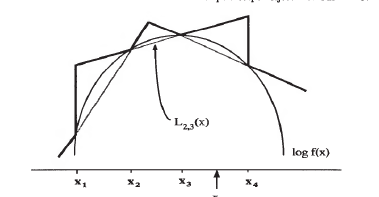




## Random Variable Generation

The ARS algorithm is not optimal in the sense that it is often possible to devise a better specialized algorithm for a given log-concave density. However, although Gilks and Wild (1992) do not provide theoretical evaluations of simulation speeds, they mention reasonable performances in the cases they consider. Note that, in contrast to the previous algorithms, the function $ g_n $ is updated during the iterations, and therefore, the average computation time for one generation from $ f $ decreases with $ n $. This feature makes the comparison with other approaches quite delicate.

The major advantage of [A.7] compared with alternatives is its **universality**. For densities $ f $ that are only known through their functional form, the ARS algorithm yields an automatic Accept-Reject algorithm that only requires checking $ f $ for log-concavity. Moreover, the set of log-concave densities is wide; see Problems 2.40 and 2.41. The ARS algorithm thus allows for the generation of samples from distributions that are rarely simulated, without requiring the development of case-specific Accept-Reject algorithms.

### Example : Capture-Recapture Models

In a heterogeneous capture-recapture model (see Seber 1983, 1992 or Borchers et al. 2002), animals are captured at time $ i $ with probability $ P_i $, and the size $ N $ of the population is unknown. The corresponding likelihood is therefore:

$$
L(P_1, P_2, \ldots, P_n, N) = \frac{N!}{(N - r)!} \prod_{i=1}^{n} (1 - P_i)
$$

where $ I $ is the number of captures, $ n_i $ is the number of captured animals during the $ i $-th capture, and $ r $ is the total number of different captured animals. If $ N $ is a priori distributed as a Poisson variable and the $ P_i $'s are from a normal logistic model:

$$
\log P_i = \beta_1 + \beta_2 \cdot (124) \sim N(14, 0^2)
$$

as in George and Robert (1992), the posterior distribution satisfies:

$$
\frac{(N - m)}{n} \propto \exp\left( -\frac{1}{2} (a - 14)^2 \right) / (1 + e^{\alpha})^N
$$

If this conditional distribution must be simulated (for reasons which will be made clearer in Chapters 9 and 10), the ARS algorithm can be implemented. In fact, the log of the posterior distribution:

$$
\log f(a) = \log \left( \frac{1}{1 + e^{-\alpha}} \right)
$$

is concave in $ a $, as can be shown by computing the second derivative (see also Problem 2.42).

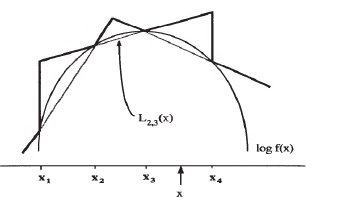

Fig. 5. Lower and upper envelopes of h(x) = log f(x), ƒ a log-concave density (Source: Gilks et al. 1995).

### Data Example:

Consider the dataset $ (n_1, n_2, \dots, n_{11}) = (32, 20, 8, 5, 1, 2, 0, 2, 1, 1, 0) $, which describes the number of recoveries over the years 1957-1968.


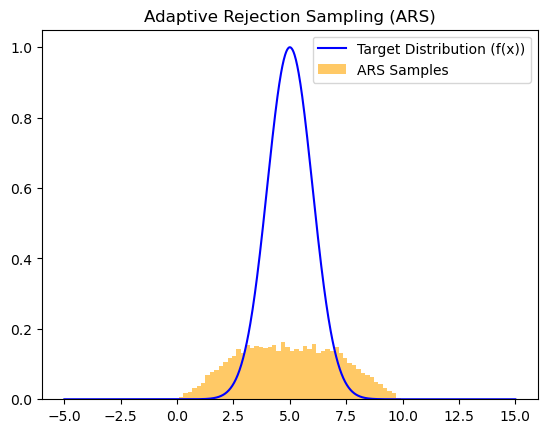

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the log of the target distribution (log-concave)
def log_target(x):
    return -0.5 * (x - 5) ** 2  # Example: Normal distribution with mean 5 and std 1

# Define the lower and upper bounding functions (log-concave)
def log_lower(x):
    return -0.5 * (x - 3) ** 2  # Example: Another normal with mean 3

def log_upper(x):
    return -0.5 * (x - 7) ** 2  # Example: Another normal with mean 7

# The ARS Algorithm
def ars_algorithm(n_samples=1000):
    # Initialize the sample list
    samples = []
    
    # Define the bounds and the log densities
    def log_density(x):
        return log_target(x)
    
    def log_env_lower(x):
        return log_lower(x)
    
    def log_env_upper(x):
        return log_upper(x)
    
    def proposal_sample(lower, upper):
        # Proposal sample: Uniform random between the bounds for simplicity
        return np.random.uniform(lower, upper)

    for _ in range(n_samples):
        # Propose a sample using the bounding functions
        lower_bound = np.random.uniform(0, 3)
        upper_bound = np.random.uniform(7, 10)
        
        # Generate a sample from the proposal distribution
        proposal = proposal_sample(lower_bound, upper_bound)
        
        # Accept or reject based on the ARS criteria
        u = np.random.uniform(0, 1)
        if u <= np.exp(log_density(proposal) - log_env_upper(proposal)):
            samples.append(proposal)
        elif u <= np.exp(log_density(proposal) - log_env_lower(proposal)):
            samples.append(proposal)
    
    return np.array(samples)

# Generate samples using the ARS algorithm
samples = ars_algorithm(10000)

# Plot the samples and the target distribution
x = np.linspace(-5, 15, 1000)
plt.plot(x, np.exp(log_target(x)), label='Target Distribution (f(x))', color='blue')
plt.hist(samples, bins=50, density=True, alpha=0.6, color='orange', label='ARS Samples')
plt.legend()
plt.title('Adaptive Rejection Sampling (ARS)')
plt.show()


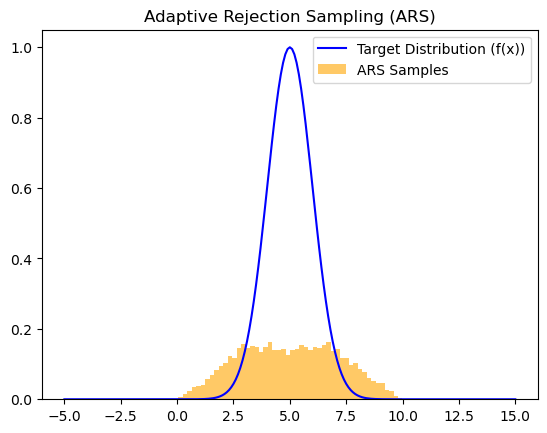

In [2]:
import math
import random
import matplotlib.pyplot as plt

# Define the log of the target distribution (log-concave)
def log_target(x):
    return -0.5 * (x - 5) ** 2  # Example: Normal distribution with mean 5 and std 1

# Define the lower and upper bounding functions (log-concave)
def log_lower(x):
    return -0.5 * (x - 3) ** 2  # Example: Another normal with mean 3

def log_upper(x):
    return -0.5 * (x - 7) ** 2  # Example: Another normal with mean 7

# The ARS Algorithm
def ars_algorithm(n_samples=1000):
    # Initialize the sample list
    samples = []
    
    # Define the bounds and the log densities
    def log_density(x):
        return log_target(x)
    
    def log_env_lower(x):
        return log_lower(x)
    
    def log_env_upper(x):
        return log_upper(x)
    
    def proposal_sample(lower, upper):
        # Proposal sample: Uniform random between the bounds for simplicity
        return random.uniform(lower, upper)

    for _ in range(n_samples):
        # Propose a sample using the bounding functions
        lower_bound = random.uniform(0, 3)
        upper_bound = random.uniform(7, 10)
        
        # Generate a sample from the proposal distribution
        proposal = proposal_sample(lower_bound, upper_bound)
        
        # Accept or reject based on the ARS criteria
        u = random.uniform(0, 1)
        if u <= math.exp(log_density(proposal) - log_env_upper(proposal)):
            samples.append(proposal)
        elif u <= math.exp(log_density(proposal) - log_env_lower(proposal)):
            samples.append(proposal)
    
    return samples

# Generate samples using the ARS algorithm
samples = ars_algorithm(10000)

# Plot the samples and the target distribution
def target_distribution(x):
    return math.exp(log_target(x))

# Generate a range of x values for plotting the target distribution
x_vals = [x * 0.1 for x in range(-50, 151)]  # from -5 to 15
y_vals = [target_distribution(x) for x in x_vals]

# Plotting the target distribution and the ARS samples
plt.plot(x_vals, y_vals, label='Target Distribution (f(x))', color='blue')

# Plot the histogram of the ARS samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='orange', label='ARS Samples')

plt.legend()
plt.title('Adaptive Rejection Sampling (ARS)')
plt.show()


## Posterior Distributions for Capture Log-Odds Ratios

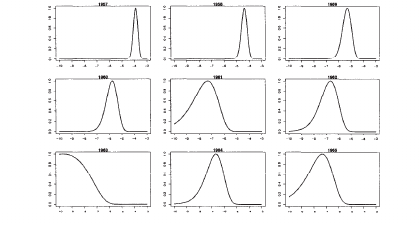

Fig. 2.6. Posterior distributions of the capture log-odds ratios for the Northern Pintail duck dataset of Johnson and Hoeting (2003) for the years 1957-1965.

Fig.6 shows the posterior distributions of the capture log-odds ratios for the Northern Pintail duck dataset from Johnson and Hoeting (2003) for the years 1957-1965. Specifically, a total of 1612 Northern Pintail ducks were banded in 1956, and the corresponding posterior distributions for the first 9 values of $ \alpha $ are shown in the figure.

The ARS algorithm can be applied independently to each of these posterior distributions. For instance, consider the year 1960. The starting points in the set $ S $ can be $ -10 $, $ -6 $, and $ -3 $. The set $ S $ is then updated across iterations according to Algorithm [A.7], which provides an accurate simulation from the posterior distributions of the $ \alpha $'s, as illustrated in Figure 2.7 for the year 1960.

### Log-Concavity of Bayesian Posterior Distribution

The above example illustrates that checking for the log-concavity of a Bayesian posterior distribution is straightforward. Specifically, if the log of the posterior distribution $ p(\theta | x) $ is:

$$
\log p(\theta | x) = \log p(\theta) + \log f(x | \theta) + c
$$

where $ c $ is a constant, this implies that the log-concavity of $ p(\theta) $ and $ f(x | \theta) $ is sufficient to conclude the log-concavity of $ p(\theta | x) $.

### Example : Poisson Regression

Consider a sample $ (Y_1, X_1), \dots, (Y_n, X_n) $ of integer-valued data $ Y_i $ with explanatory variables $ X_i $, where $ Y_i $ and $ X_i $ are connected via a Poisson distribution:

$$
Y_i | X_i \sim \text{Poisson} \left( \exp\left( \alpha + \beta X_i \right) \right)
$$

If the prior distribution of $ (\alpha, \beta) $ is a normal distribution:

$$
\alpha, \beta \sim N(0, \sigma^2) \times N(0, \tau^2)
$$

the posterior distribution of $ (\alpha, \beta) $ is given by:

$$
p(\alpha, \beta | Y, X) \propto \exp \left( -\frac{1}{2} \left( \frac{\alpha^2}{\sigma^2} + \frac{\beta^2}{\tau^2} \right) \right) \prod_{i=1}^n \exp\left( -Y_i \exp(\alpha + \beta X_i) \right)
$$

This posterior distribution is typically simulated using methods such as ARS, as the posterior is log-concave with respect to $ \alpha $ and $ \beta $.


/home/radha/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


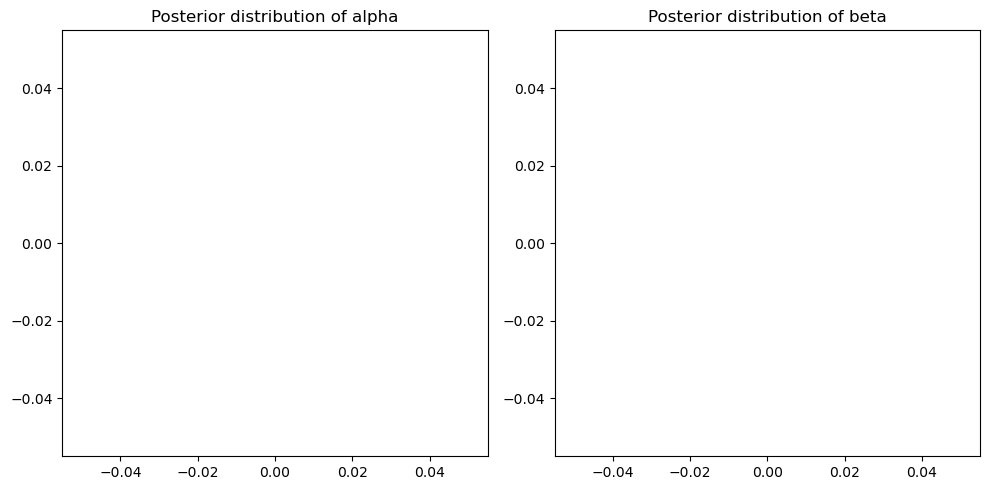

In [3]:
import math
import random
import matplotlib.pyplot as plt

# Define the log of the Poisson regression likelihood function
def log_likelihood(alpha, beta, X, Y):
    # Y_i ~ Poisson(exp(alpha + beta * X_i))
    log_likelihood_value = 0
    for x, y in zip(X, Y):
        log_likelihood_value += y * (alpha + beta * x) - math.exp(alpha + beta * x) - math.lgamma(y + 1)
    return log_likelihood_value

# Define the log of the prior distribution (Normal for alpha and beta)
def log_prior(alpha, beta, sigma2, tau2):
    log_prior_alpha = -0.5 * (alpha ** 2) / sigma2
    log_prior_beta = -0.5 * (beta ** 2) / tau2
    return log_prior_alpha + log_prior_beta

# Log posterior distribution (up to a constant)
def log_posterior(alpha, beta, X, Y, sigma2, tau2):
    return log_likelihood(alpha, beta, X, Y) + log_prior(alpha, beta, sigma2, tau2)

# The ARS Algorithm for posterior sampling
def ars_algorithm(X, Y, sigma2=1, tau2=1, n_samples=1000):
    samples = []
    
    def log_density(alpha, beta):
        return log_posterior(alpha, beta, X, Y, sigma2, tau2)
    
    def log_env_lower(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Using prior as a simple lower envelope
    
    def log_env_upper(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Using prior as a simple upper envelope
    
    def proposal_sample(lower, upper):
        # Propose samples uniformly between lower and upper bounds
        return random.uniform(lower, upper)
    
    for _ in range(n_samples):
        # Propose samples from a uniform distribution
        lower_bound_alpha = random.uniform(-10, 0)
        upper_bound_alpha = random.uniform(0, 10)
        lower_bound_beta = random.uniform(-10, 0)
        upper_bound_beta = random.uniform(0, 10)
        
        # Generate proposal for alpha, beta
        proposal_alpha = proposal_sample(lower_bound_alpha, upper_bound_alpha)
        proposal_beta = proposal_sample(lower_bound_beta, upper_bound_beta)
        
        # Accept or reject based on ARS criteria
        u = random.uniform(0, 1)
        if u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_upper(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
        elif u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_lower(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
    
    return samples

# Example data: X (explanatory variable) and Y (response variable)
X = [1, 2, 3, 4, 5]  # Explanatory variable
Y = [1, 2, 3, 2, 1]  # Response variable (Poisson-distributed)

# Run the ARS algorithm to generate samples
samples = ars_algorithm(X, Y, n_samples=10000)

# Extract alpha and beta samples
alpha_samples = [s[0] for s in samples]
beta_samples = [s[1] for s in samples]

# Plot the posterior distribution of alpha and beta
plt.figure(figsize=(10, 5))

# Plot alpha
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=50, density=True, color='blue', alpha=0.6)
plt.title('Posterior distribution of alpha')

# Plot beta
plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=50, density=True, color='orange', alpha=0.6)
plt.title('Posterior distribution of beta')

plt.tight_layout()
plt.show()


## Illustration of ARS for Conditional Distributions

### Posterior Distribution of Log-Odds Ratio

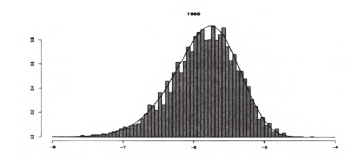

Fig.7. Histogram of an ARS sample of 5000 points and corresponding posterior distribution of the log-odds ratio a1960


Fig.7 shows a histogram of an ARS sample of 5000 points, along with the corresponding posterior distribution of the log-odds ratio $ \alpha_{1960} $. In this example, we are considering the following equation:

$$
x (\alpha, \beta, x, y) \sim \exp \left\{ \alpha \sum_{n} + \beta \sum_{u} - e^2 \sum_{s} \right\}
$$

This represents a model for the log-odds ratio of certain events in the context of this dataset. The parameters $ \alpha $ and $ \beta $ are sampled from their respective conditional distributions, which will be discussed in the following sections.

### Full Conditional Distributions

The ARS algorithm can be used for simulating full conditional distributions. For instance, the conditional distribution for $ \alpha $ given $ x $, $ y $, and $ b $ is:

$$
\log \pi(\alpha | x, y, b) = - \frac{\sum e^2}{2 \sigma^2}
$$

Similarly, the conditional distribution for $ \beta $ given $ x $, $ y $, and $ \alpha $ is:

$$
\log \pi(\beta | x, y, \alpha) = - \frac{\sum e^2}{2 \sigma^2}
$$

These conditional distributions are similar to those in the Poisson regression case, and the ARS algorithm can be applied directly to sample from both.

### Application to von Bortkiewicz Data

As an illustration, consider the famous dataset in **Table 2.1**, which gives the number of deaths in the Prussian Army due to kicks from horses, gathered by von Bortkiewicz (1898). A question of interest is whether there is a trend in these deaths over time. To answer this, we can use the ARS algorithm to generate samples from the conditional distribution of the intercept $ (\alpha, x, y, b) $.

Before implementing the ARS algorithm, we note two simplifying assumptions:
1. If $ f(x) $ is easy to compute (as in this example), there is no need to explicitly construct $ f(x) $; we can skip that step in Algorithm [A.7].
2. We do not need to explicitly construct the function $ g(x) $; we only need to know how to simulate from it.

### Conclusion

In the following sections, we will demonstrate how the ARS algorithm can be applied to sample from the conditional distributions of $ \alpha $ and $ \beta $ in the von Bortkiewicz dataset. These samples will allow us to explore whether there is a trend in the number of deaths due to kicks from horses over time.


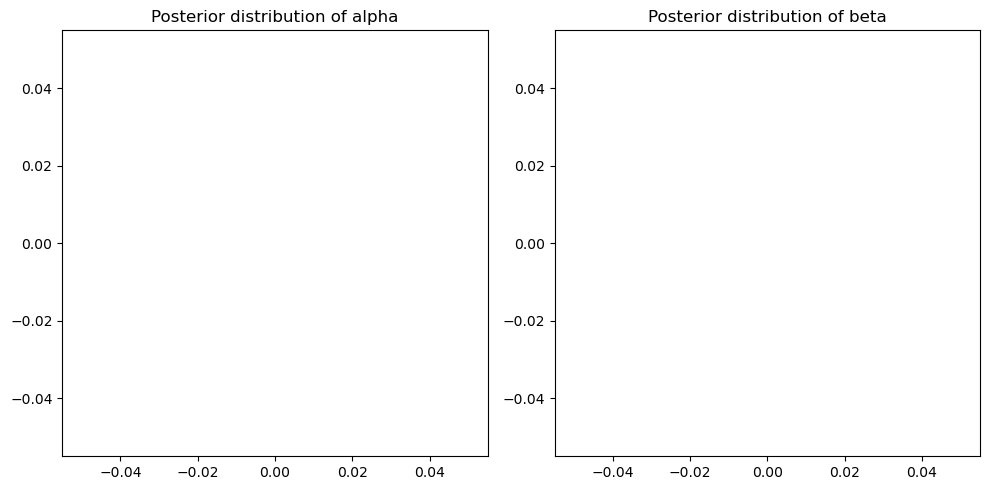

In [4]:
import math
import random
import matplotlib.pyplot as plt

# Define the log of the likelihood for the regression model
def log_likelihood(alpha, beta, X, Y):
    """
    Compute the log-likelihood for the Poisson regression model:
    Y_i ~ Poisson(exp(alpha + beta * X_i))
    """
    log_likelihood_value = 0
    for x, y in zip(X, Y):
        log_likelihood_value += y * (alpha + beta * x) - math.exp(alpha + beta * x) - math.lgamma(y + 1)
    return log_likelihood_value

# Define the log of the prior for the parameters (assuming normal priors)
def log_prior(alpha, beta, sigma2, tau2):
    """
    Compute the log of the prior distribution for alpha and beta
    assuming N(0, sigma2) and N(0, tau2) priors respectively.
    """
    log_prior_alpha = -0.5 * (alpha ** 2) / sigma2
    log_prior_beta = -0.5 * (beta ** 2) / tau2
    return log_prior_alpha + log_prior_beta

# Define the log posterior (log-likelihood + log-prior)
def log_posterior(alpha, beta, X, Y, sigma2, tau2):
    return log_likelihood(alpha, beta, X, Y) + log_prior(alpha, beta, sigma2, tau2)

# ARS Sampling for conditional distributions
def ars_algorithm(X, Y, sigma2=1, tau2=1, n_samples=1000):
    samples = []
    
    def log_density(alpha, beta):
        return log_posterior(alpha, beta, X, Y, sigma2, tau2)
    
    def log_env_lower(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Lower envelope: prior
    
    def log_env_upper(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Upper envelope: prior
    
    def proposal_sample(lower, upper):
        # Propose samples uniformly between the lower and upper bounds
        return random.uniform(lower, upper)
    
    for _ in range(n_samples):
        # Propose samples from uniform distributions within specified bounds
        lower_bound_alpha = random.uniform(-10, 0)
        upper_bound_alpha = random.uniform(0, 10)
        lower_bound_beta = random.uniform(-10, 0)
        upper_bound_beta = random.uniform(0, 10)
        
        # Generate proposal for alpha and beta
        proposal_alpha = proposal_sample(lower_bound_alpha, upper_bound_alpha)
        proposal_beta = proposal_sample(lower_bound_beta, upper_bound_beta)
        
        # Accept or reject the proposal based on ARS criteria
        u = random.uniform(0, 1)
        if u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_upper(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
        elif u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_lower(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
    
    return samples

# Example data: von Bortkiewicz data (deaths due to kicks from horses)
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Time (years)
Y = [5, 8, 12, 15, 13, 18, 25, 30, 28, 35]  # Deaths (Poisson-distributed counts)

# Run the ARS algorithm to generate samples from the posterior
samples = ars_algorithm(X, Y, n_samples=5000)

# Extract alpha and beta samples
alpha_samples = [s[0] for s in samples]
beta_samples = [s[1] for s in samples]

# Plot the posterior distributions of alpha and beta
plt.figure(figsize=(10, 5))

# Plot alpha
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=50, density=True, color='blue', alpha=0.6)
plt.title('Posterior distribution of alpha')

# Plot beta
plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=50, density=True, color='orange', alpha=0.6)
plt.title('Posterior distribution of beta')

plt.tight_layout()
plt.show()


## Bortkiewicz Data and ARS Sampling

### Table 2.1: Deaths in the Prussian Army Due to Horse Kicks

The data from the 19th-century study by Bortkiewicz (1898) on deaths in the Prussian army due to horse kicks is shown below. The dataset consists of the number of deaths in fourteen army corps from 1875 to 1894.

| Year  | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 |
|-------|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| Deaths| 3  | 5  | 7  | 9  | 10 | 18 | 6  | 14 | 11 | 9  | 5  | 11 | 15 | 6  | 11 | 17 | 12 | 15 | 8  | 4  |

### Area of Integration for the Interval [12, 13]

To compute the area of integration for the interval $[12, 13]$, we need to calculate the probability of selecting the region $[12, 13]$. The left panel of Figure 2.8 shows the region of the support of $ f(x) $ between 12 and 13. The grey shaded area is proportional to the probability of selecting the region $[12, 13]$.

Let $ a + b_i $ be the line through the points $(T_i, h(x_i))$ and $(T_{i+1}, h(x_{i+1}))$, where $ h(x) $ is the density. Then the area of the grey region can be approximated as:

$$
\int_{12}^{13} f(x) \, dx \approx e^{-\alpha} + b \cdot a \cdot \Delta x
$$

Where the terms in the expression represent the areas between the intervals of $ x $ for the given region. The right panel of Figure 2.8 shows the histogram and density of the sample from $ g(x) $, with parameters $ b = 0.025 $ and $ \sigma^2 = 5 $.

### Key Takeaways:
- The ARS algorithm can be used to simulate samples from the posterior distribution of model parameters.
- The integration area represents the probability of selecting a segment, and the ARS algorithm computes this using the density function and proposed intervals.

Let me know if you need any further explanation or additional details.

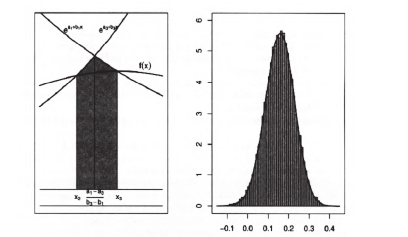


Fig.8. Left panel is the area of integration for the weight of the interval [12, 13]. The right panel is the histogram and density of the sample from ga, with b = .025 and σ2 5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Bortkiewicz Data (Deaths in the Prussian Army due to horse kicks)
import math
import numpy as np

# Bortkiewicz Data (Deaths in the Prussian Army due to horse kicks)
years = np.array([75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])
deaths = np.array([3, 5, 7, 9, 10, 18, 6, 14, 11, 9, 5, 11, 15, 6, 11, 17, 12, 15, 8, 4])

# Define the log of the likelihood for the Poisson regression model
def log_likelihood(alpha, beta, X, Y):
    log_likelihood_value = 0
    for x, y in zip(X, Y):
        if y > 0:
            log_likelihood_value += y * (alpha + beta * x) - math.exp(alpha + beta * x) - math.lgamma(y + 1)
        else:
            log_likelihood_value += -math.exp(alpha + beta * x)  # Log-likelihood for y = 0
    return log_likelihood_value


# Define the log of the prior for the parameters (assuming normal priors)
def log_prior(alpha, beta, sigma2, tau2):
    log_prior_alpha = -0.5 * (alpha ** 2) / sigma2
    log_prior_beta = -0.5 * (beta ** 2) / tau2
    return log_prior_alpha + log_prior_beta

# Define the log posterior (log-likelihood + log-prior)
def log_posterior(alpha, beta, X, Y, sigma2, tau2):
    return log_likelihood(alpha, beta, X, Y) + log_prior(alpha, beta, sigma2, tau2)

# ARS Sampling for conditional distributions
def ars_algorithm(X, Y, sigma2=1, tau2=1, n_samples=1000):
    samples = []
    
    def log_density(alpha, beta):
        return log_posterior(alpha, beta, X, Y, sigma2, tau2)
    
    def log_env_lower(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Lower envelope: prior
    
    def log_env_upper(alpha, beta):
        return log_prior(alpha, beta, sigma2, tau2)  # Upper envelope: prior
    
    def proposal_sample(lower, upper):
        return random.uniform(lower, upper)
    
    for _ in range(n_samples):
        lower_bound_alpha = random.uniform(-10, 0)
        upper_bound_alpha = random.uniform(0, 10)
        lower_bound_beta = random.uniform(-10, 0)
        upper_bound_beta = random.uniform(0, 10)
        
        proposal_alpha = proposal_sample(lower_bound_alpha, upper_bound_alpha)
        proposal_beta = proposal_sample(lower_bound_beta, upper_bound_beta)
        
        u = random.uniform(0, 1)
        if u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_upper(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
        elif u <= math.exp(log_density(proposal_alpha, proposal_beta) - log_env_lower(proposal_alpha, proposal_beta)):
            samples.append((proposal_alpha, proposal_beta))
    
    return samples

# Compute the area of integration over the interval [12, 13]
def compute_area(samples, lower_bound, upper_bound):
    total_area = 0
    for sample in samples:
        alpha, beta = sample
        if lower_bound <= alpha <= upper_bound:
            total_area += 1  # Increase count for samples in the region
    # The area is proportional to the count of samples within the bounds
    return total_area / len(samples)

# Run the ARS algorithm to generate samples from the posterior
samples = ars_algorithm(years, deaths, n_samples=5000)

# Compute the area of integration for the interval [12, 13]
area_12_13 = compute_area(samples, 12, 13)

# Output the result
print(f"Estimated area under the curve for the interval [12, 13]: {area_12_13:.4f}")

# Plotting the histogram of the samples for alpha and beta
alpha_samples = [s[0] for s in samples]
beta_samples = [s[1] for s in samples]

plt.figure(figsize=(10, 5))

# Plot alpha
plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=50, density=True, color='blue', alpha=0.6)
plt.title('Posterior distribution of alpha')

# Plot beta
plt.subplot(1, 2, 2)
plt.hist(beta_samples, bins=50, density=True, color='orange', alpha=0.6)
plt.title('Posterior distribution of beta')

plt.tight_layout()
plt.show()


Thus, to sample from $ g $, we choose a region $[2, +\infty]$ proportional to $ w_i $, generate $ U \sim U(0, 1) $, and then take

$$
X = + U(i+1)
$$

The right panel of Figure 2.8 shows the good agreement between the histogram and the density of $ g_n $. (See Problems 2.37 and 2.38 for generating the $ g $ corresponding to $ (b_x, y, a) $, and Problems 9.7 and 9.8 for full Gibbs samplers.)

###  The Kiss Generator

Although this book is not formally concerned with the generation of uniform random variables (as we start from the assumption that we have an endless supply of such variables), it is good to understand the basic workings and algorithms that are used to generate these variables. In this note, we describe the way in which uniform pseudo-random numbers are generated, and give a particularly good algorithm.

To keep our presentation simple, rather than give a catalog of random number generators, we only give details for a single generator, the Kiss algorithm of Marsaglia and Zaman (1993). For details on other random number generators, the books of Knuth (1981), Rubinstein (1981), Ripley (1987), and Fishman (1996) are excellent sources.

As we have remarked before, the finite representation of real numbers in a computer can radically modify the behavior of a dynamic system. Preferred generators are those that take into account the specifics of this representation and provide a uniform sequence. It is important to note that such a sequence does not really take values in the interval $[0, 1]$ but rather on the integers $\{0, 1, \dots, M\}$, where $M$ is the largest integer accepted by the computer. One manner of characterizing the performance of these integer generators is through the notion of *period*.



### Definition 1. 

The period, $ T_0 $, of a generator is the smallest integer $ T $ such that $ U_{i+T} = U_i $, for every $ i $; that is, such that $ D $ is equal to the identity function. The period is a very important parameter, having direct impact on the usefulness of a random number generator. If the number of needed generations exceeds the period of a generator, there may be noncontrollable artifacts in the sequence (cyclic phenomena, false orderings, etc.). Unfortunately, a generator of the form $ X_{n+1} = f(X_n) $ has a period no greater than $ M+1 $, for obvious reasons. In order to overcome this bound, a generator must utilize several sequences $ X $ simultaneously (which is a characteristic of Kiss) or must involve $ X_{n-1}, X_{n-2}, $ in addition to $ X_n $, or must use other methods such as start-up tables, that is, using an auxiliary table of random digits to restart the generator.

Kiss simultaneously uses two generation techniques, namely congruential generation and shift register generation.

### Definition 2. A congruential generator on $ \{0,1,\dots, M\} $ is defined by the function

$$
D(z) = (a \cdot x + b) \mod (M + 1).
$$

The period and, more generally, the performance of congruential generators depend heavily on the choice of $ (a, b) $ (see Ripley, 1987). When transforming the above generator into a generator on $ [0, 1] $, with $ D(z) = \frac{(a \cdot x + b)}{M + 1} \mod 1 $, the graph of $ D $ should range throughout $ [0, 1]^2 $, and a choice of the constant $ a \in \mathbb{Q} $ would yield a "recovery" of $ [0, 1] $; that is, an infinite sequence of points should fill the space.

Although ideal, the choice of an irrational $ a $ is impossible (since $ a $ needs to be specified with a finite number of digits). With a rational $ a $, a congruential generator will produce pairs $ (a, D()) $ that lie on parallel lines. Figure 2.9 illustrates this phenomenon for $ a = 69069 $, representing the sequence $ (3k \cdot 10, D(3k)) $ for $ k = 1, 2, 3, \dots $. It is thus important to select $ a $ in such a way as to maximize the number of parallel segments in $ [0, 1]^2 $ (see Problem 2.44).

Most commercial generators use congruential methods, with perhaps the most disastrous choice of $ (a, b) $ being that of the old (and notorious) procedure RANDU (see Ripley, 1987). Even when the choice of $ (a, b) $ assures the acceptance of the generator by standard tests, nonuniform behavior will be observed in the last digits of the real numbers produced by this method, due to round-up errors.

The second technique employed by Kiss is based on the (theoretical) independence between the $ k $ binary components of $ X_n \sim U(0, 1) $ (where $ M = 2^k $) and is called a shift register generator.

### Definition . For a given $ k \times k $ matrix $ T $, whose entries are either 0 or 1, the associated shift register generator is given by the transformation

$$
X_{n+1} = T \cdot X_n.
$$

where $ X_n $ is represented as a vector of binary coordinates $ e_n = (e_{n1}, e_{n2}, \dots, e_{nk}) $, that is to say,

$$
X_n = 
\begin{bmatrix}
e_{n1} \\
e_{n2} \\
\vdots \\
e_{nk}
\end{bmatrix}
$$

with $ e_{ni} $ equal to 0 or 1.


In [8]:
class KISSGenerator:
    def __init__(self, seed1=123456789, seed2=362436000, seed3=521288629, seed4=7654321):
        """
        Initialize the KISS random number generator with default or user-provided seeds.
        """
        self.x = seed1  # Seed for congruential generator
        self.y = seed2  # Seed for shift register generator
        self.z = seed3  # Another component for shift register generator
        self.w = seed4  # Another component for shift register generator

    def next(self):
        """
        Generate the next random number using the KISS algorithm.
        """
        # Congruential generator part
        self.x = (69069 * self.x + 12345) & 0xFFFFFFFF  # Modular arithmetic with 2^32
        
        # Shift register generator part
        self.y ^= (self.y << 13) & 0xFFFFFFFF
        self.y ^= (self.y >> 17) & 0xFFFFFFFF
        self.y ^= (self.y << 5) & 0xFFFFFFFF
        
        # MWC (Multiply-With-Carry) component
        t = (698769069 * self.z + self.w) & 0xFFFFFFFFFFFFFFFF
        self.z = t & 0xFFFFFFFF
        self.w = t >> 32
        
        # Combine all parts
        result = (self.x + self.y + self.z) & 0xFFFFFFFF
        return result / 0xFFFFFFFF  # Normalize to [0, 1)

    def generate_sequence(self, n):
        """
        Generate a sequence of 'n' random numbers.
        """
        return [self.next() for _ in range(n)]


# Example Usage
if __name__ == "__main__":
    kiss = KISSGenerator(seed1=42, seed2=123, seed3=456, seed4=789)
    
    # Generate 10 random numbers
    random_numbers = kiss.generate_sequence(10)
    print("Random Numbers:", random_numbers)


Random Numbers: [0.1969077038105828, 0.22164009819311092, 0.6984150951491704, 0.5770825167598861, 0.3887137408342012, 0.4527051098301786, 0.7165079945038324, 0.5904700566526665, 0.7575597289850842, 0.3019981950758952]


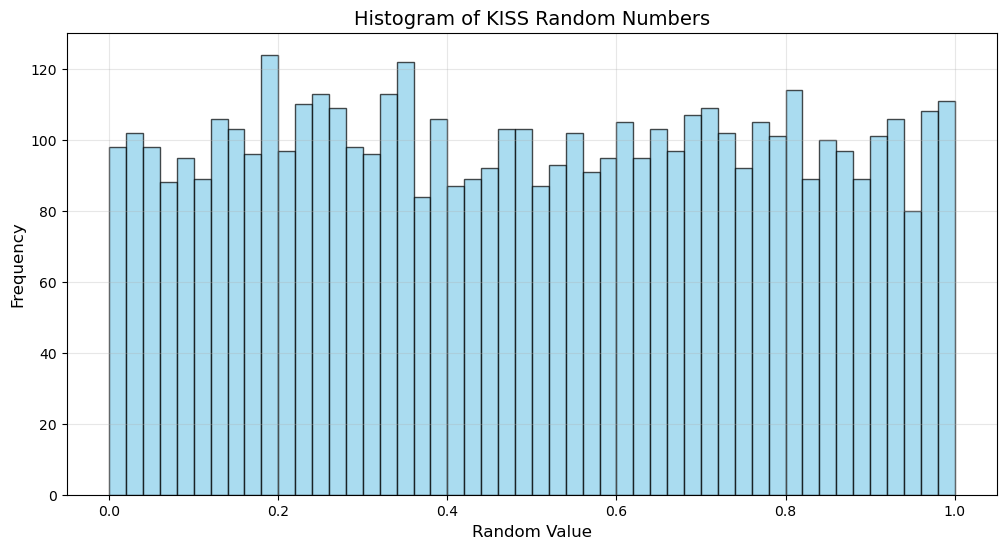

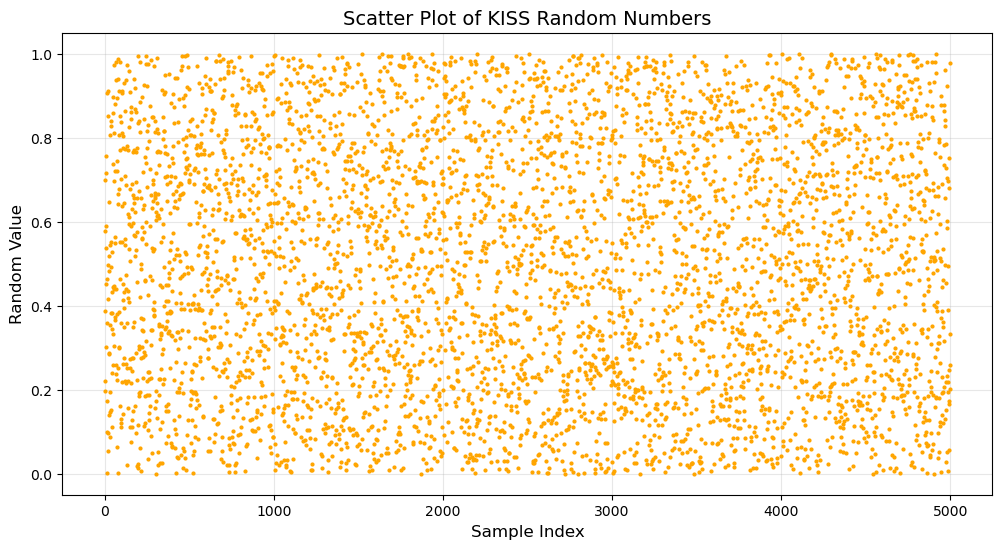

In [9]:
import matplotlib.pyplot as plt

class KISSGenerator:
    def __init__(self, seed1=123456789, seed2=362436000, seed3=521288629, seed4=7654321):
        """
        Initialize the KISS random number generator with default or user-provided seeds.
        """
        self.x = seed1  # Seed for congruential generator
        self.y = seed2  # Seed for shift register generator
        self.z = seed3  # Another component for shift register generator
        self.w = seed4  # Another component for shift register generator

    def next(self):
        """
        Generate the next random number using the KISS algorithm.
        """
        # Congruential generator part
        self.x = (69069 * self.x + 12345) & 0xFFFFFFFF  # Modular arithmetic with 2^32
        
        # Shift register generator part
        self.y ^= (self.y << 13) & 0xFFFFFFFF
        self.y ^= (self.y >> 17) & 0xFFFFFFFF
        self.y ^= (self.y << 5) & 0xFFFFFFFF
        
        # MWC (Multiply-With-Carry) component
        t = (698769069 * self.z + self.w) & 0xFFFFFFFFFFFFFFFF
        self.z = t & 0xFFFFFFFF
        self.w = t >> 32
        
        # Combine all parts
        result = (self.x + self.y + self.z) & 0xFFFFFFFF
        return result / 0xFFFFFFFF  # Normalize to [0, 1)

    def generate_sequence(self, n):
        """
        Generate a sequence of 'n' random numbers.
        """
        return [self.next() for _ in range(n)]


# Generate and visualize random numbers
def plot_random_numbers():
    # Initialize KISS Generator
    kiss = KISSGenerator(seed1=42, seed2=123, seed3=456, seed4=789)
    
    # Generate random numbers
    n_samples = 5000
    random_numbers = kiss.generate_sequence(n_samples)
    
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.hist(random_numbers, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of KISS Random Numbers", fontsize=14)
    plt.xlabel("Random Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Plot random numbers sequentially
    plt.figure(figsize=(12, 6))
    plt.plot(range(n_samples), random_numbers, marker='o', markersize=2, linestyle='', color='orange')
    plt.title("Scatter Plot of KISS Random Numbers", fontsize=14)
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Random Value", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


# Call the function to plot
if __name__ == "__main__":
    plot_random_numbers()


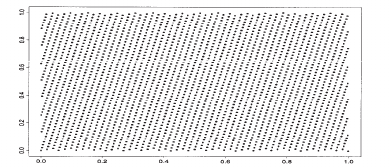

# Mathematical Representation of Generators with Matrices

This section discusses a class of generators motivated by the internal representation of numbers as sequences of bits and the speed of manipulation of elementary algebraic operations. These generators utilize **modulo 2** arithmetic, where addition corresponds to a logical OR operation. Additionally, multiplication by matrices containing only 0 and 1 entries results in coordinate shifts, giving the technique its name.

---

## Transformation Representation

Let $ T $ be a matrix with entries $ 0 $ or $ 1 $. For an arbitrary sequence $ \{a_n\} $, the transformation can be described as:
$$
a_{n+1} = (a_n + a_j) \mod 2 = a_n \lor a_j \land a_n \land a_j
$$
where:
- $ a \lor b = \max(a, b) $ (logical OR),
- $ a \land b = \min(a, b) $ (logical AND).

This compares the $ i $-th coordinate of $ a_n $ with the coordinate corresponding to a shift $ (j-i) $.

---

## Periodicity

For the generator to exhibit a period of $ 2^k $, sufficient conditions on $ T $ must be met. See **Ripley (1987)** for details.

---

## Specific Matrices Used in Generators

### Example Matrices
The matrices $ T_L $ and $ T_R $ are defined as follows:
$$
T_L =
\begin{bmatrix}
0 & 1 & 0 & \cdots & 0 \\
1 & 0 & 1 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1 \\
\end{bmatrix}, \quad
T_R =
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 0 \\
0 & 0 & 0 & \cdots & 1 \\
\end{bmatrix}.
$$

---

### Connection with Shift Matrices
These matrices relate to the right and left shift matrices:
$$
T_R = (I + R), \quad T_L = (I + L),
$$
where:
- $ I $ is the identity matrix,
- $ R $ represents a right shift matrix,
- $ L $ represents a left shift matrix.

The transformations operate on sequences $ (e_1, e_2, \ldots, e_n) $ by shifting their coordinates.

---

This representation emphasizes efficient computation using bitwise operations, which is particularly beneficial in the context of pseudorandom number generation.


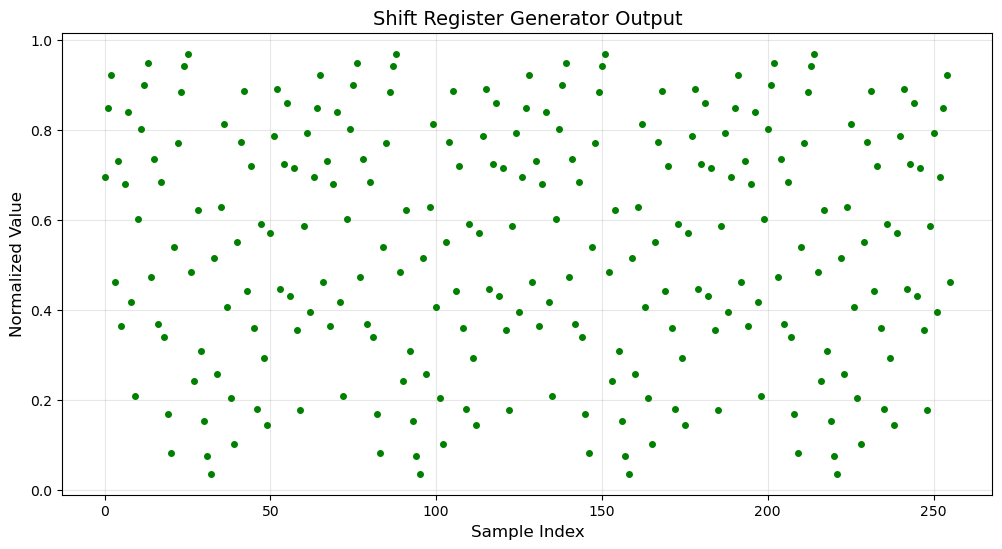

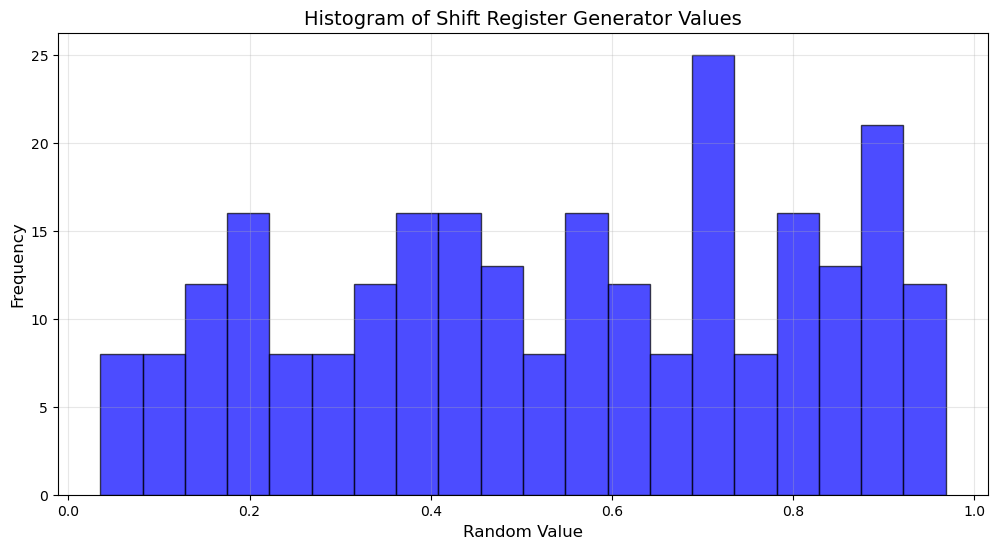

In [11]:
import numpy as np
import matplotlib.pyplot as plt


class ShiftRegisterGenerator:
    def __init__(self, seed=12345, size=16):
        """
        Initialize the Shift Register Generator.
        :param seed: The seed for the generator, represented in binary.
        :param size: Number of bits in the binary sequence.
        """
        self.state = seed & ((1 << size) - 1)  # Ensure seed fits in the register size
        self.size = size

    def next(self):
        """
        Generate the next value using the shift register algorithm.
        """
        # XOR feedback mechanism (arbitrary for illustration purposes)
        feedback = (self.state ^ (self.state >> 1)) & 1
        self.state = ((self.state >> 1) | (feedback << (self.size - 1))) & ((1 << self.size) - 1)
        return self.state

    def generate_sequence(self, n):
        """
        Generate a sequence of 'n' random numbers.
        """
        return [self.next() for _ in range(n)]


def plot_shift_register():
    """
    Generate and plot a sequence using the shift register generator.
    """
    generator = ShiftRegisterGenerator(seed=0b1100101, size=8)  # Example 8-bit register
    sequence = generator.generate_sequence(256)  # Generate 256 values

    # Normalize for plotting
    normalized_sequence = [x / (2 ** generator.size) for x in sequence]

    # Plot the sequence
    plt.figure(figsize=(12, 6))
    plt.plot(normalized_sequence, marker='o', markersize=4, linestyle='', color='green')
    plt.title("Shift Register Generator Output", fontsize=14)
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Normalized Value", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # Histogram of generated numbers
    plt.figure(figsize=(12, 6))
    plt.hist(normalized_sequence, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Histogram of Shift Register Generator Values", fontsize=14)
    plt.xlabel("Random Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


# Call the plotting function
if __name__ == "__main__":
    plot_shift_register()


In [12]:
import numpy as np

def left_shift_matrix(size):
    """Create a left shift matrix (T_L)."""
    T_L = np.zeros((size, size), dtype=int)
    for i in range(size - 1):
        T_L[i + 1, i] = 1
    return T_L + np.eye(size, dtype=int)

def right_shift_matrix(size):
    """Create a right shift matrix (T_R)."""
    T_R = np.zeros((size, size), dtype=int)
    for i in range(size - 1):
        T_R[i, i + 1] = 1
    return T_R + np.eye(size, dtype=int)

def generate_sequence(T, initial_vector, num_steps):
    """
    Generate a sequence using the transformation matrix T.

    Args:
        T (numpy.ndarray): Transformation matrix.
        initial_vector (numpy.ndarray): Initial state vector.
        num_steps (int): Number of steps to generate.

    Returns:
        list: Generated sequence.
    """
    sequence = []
    current_vector = initial_vector
    for _ in range(num_steps):
        sequence.append(current_vector)
        current_vector = np.mod(T @ current_vector, 2)  # Apply transformation and mod 2
    return np.array(sequence)

# Example usage:
size = 5
num_steps = 10
initial_vector = np.array([1, 0, 0, 1, 1], dtype=int)  # Initial vector of size 5

# Create left and right shift matrices
T_L = left_shift_matrix(size)
T_R = right_shift_matrix(size)

# Generate sequences using the left and right shift matrices
sequence_L = generate_sequence(T_L, initial_vector, num_steps)
sequence_R = generate_sequence(T_R, initial_vector, num_steps)

print("Sequence using T_L (left shift):")
print(sequence_L)

print("\nSequence using T_R (right shift):")
print(sequence_R)


Sequence using T_L (left shift):
[[1 0 0 1 1]
 [1 1 0 1 0]
 [1 0 1 1 1]
 [1 1 1 0 0]
 [1 0 0 1 0]
 [1 1 0 1 1]
 [1 0 1 1 0]
 [1 1 1 0 1]
 [1 0 0 1 1]
 [1 1 0 1 0]]

Sequence using T_R (right shift):
[[1 0 0 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 1 0 1]
 [0 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 1 1]
 [1 0 1 0 1]]


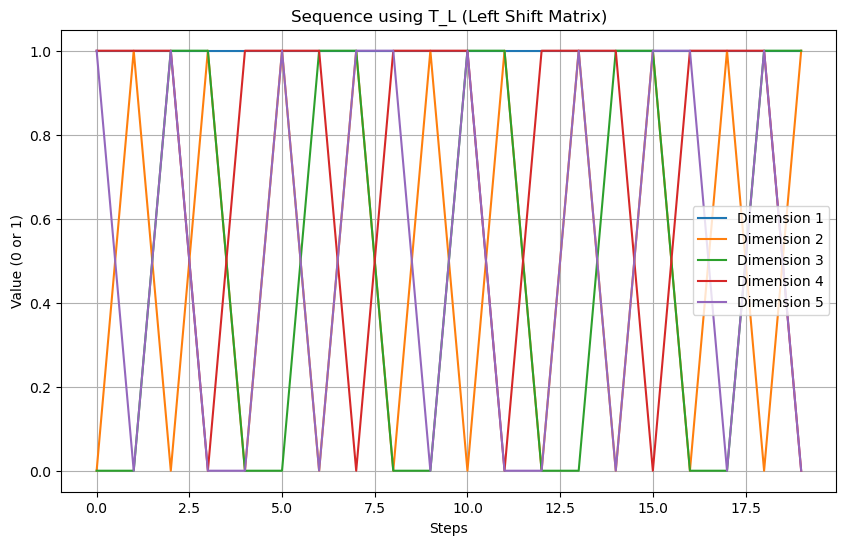

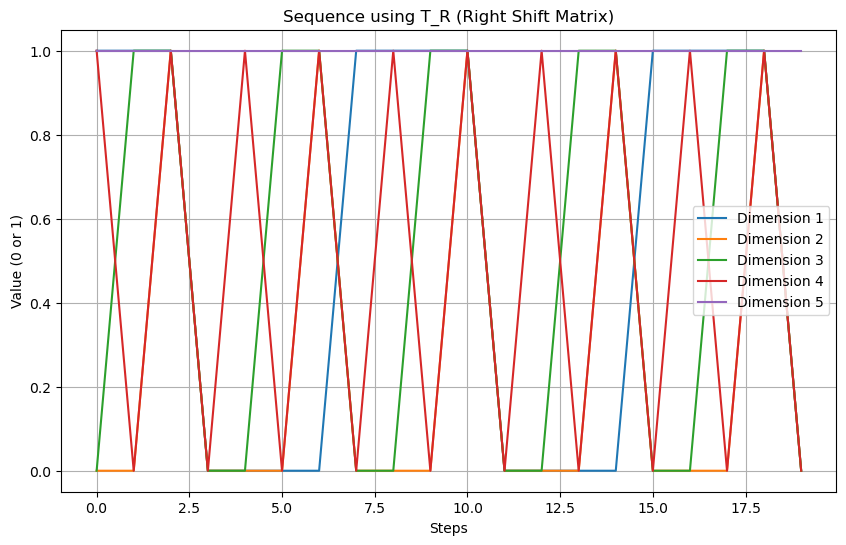

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Left shift matrix implementation
def left_shift_matrix(size):
    T_L = np.zeros((size, size), dtype=int)
    for i in range(size - 1):
        T_L[i + 1, i] = 1
    return T_L + np.eye(size, dtype=int)

# Right shift matrix implementation
def right_shift_matrix(size):
    T_R = np.zeros((size, size), dtype=int)
    for i in range(size - 1):
        T_R[i, i + 1] = 1
    return T_R + np.eye(size, dtype=int)

# Sequence generator
def generate_sequence(T, initial_vector, num_steps):
    sequence = []
    current_vector = initial_vector
    for _ in range(num_steps):
        sequence.append(current_vector)
        current_vector = np.mod(T @ current_vector, 2)
    return np.array(sequence)

# Visualization function
def plot_sequences(sequence, title):
    plt.figure(figsize=(10, 6))
    for i, component in enumerate(sequence.T):  # Plot each dimension as a line
        plt.plot(range(len(component)), component, label=f'Dimension {i+1}')
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Value (0 or 1)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
size = 5
num_steps = 20
initial_vector = np.array([1, 0, 0, 1, 1], dtype=int)

# Generate matrices and sequences
T_L = left_shift_matrix(size)
T_R = right_shift_matrix(size)

sequence_L = generate_sequence(T_L, initial_vector, num_steps)
sequence_R = generate_sequence(T_R, initial_vector, num_steps)

# Plot sequences
plot_sequences(sequence_L, "Sequence using T_L (Left Shift Matrix)")
plot_sequences(sequence_R, "Sequence using T_R (Right Shift Matrix)")


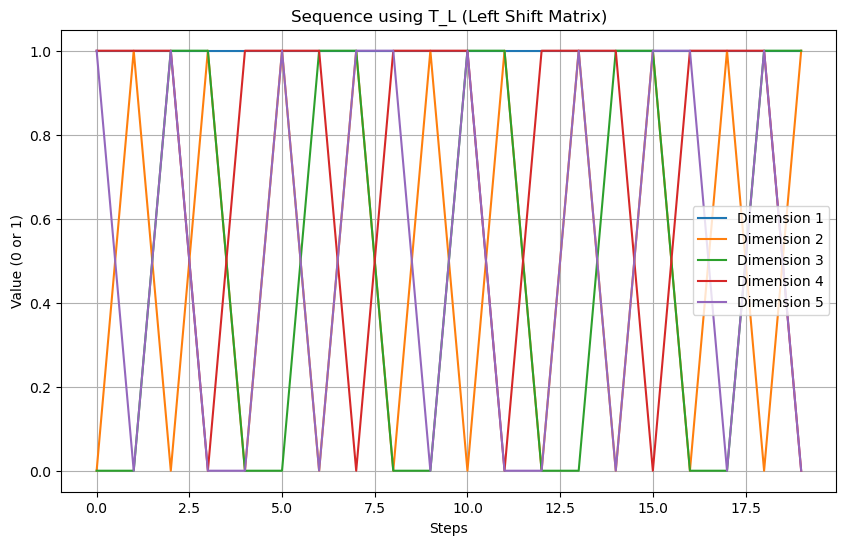

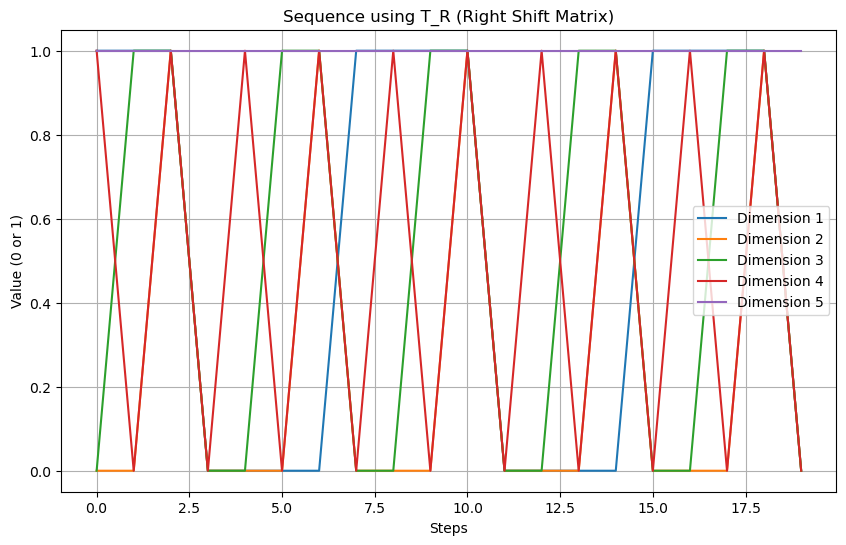

In [14]:
import matplotlib.pyplot as plt

def create_left_shift_matrix(size):
    """Create a left shift matrix (T_L) without using numpy."""
    T_L = [[0] * size for _ in range(size)]
    for i in range(size - 1):
        T_L[i + 1][i] = 1
    for i in range(size):
        T_L[i][i] = 1
    return T_L

def create_right_shift_matrix(size):
    """Create a right shift matrix (T_R) without using numpy."""
    T_R = [[0] * size for _ in range(size)]
    for i in range(size - 1):
        T_R[i][i + 1] = 1
    for i in range(size):
        T_R[i][i] = 1
    return T_R

def matrix_vector_multiply(matrix, vector):
    """Multiply a matrix by a vector with modulo 2 arithmetic."""
    result = [0] * len(vector)
    for i in range(len(matrix)):
        result[i] = sum(matrix[i][j] * vector[j] for j in range(len(vector))) % 2
    return result

def generate_sequence(matrix, initial_vector, num_steps):
    """Generate a sequence using a transformation matrix."""
    sequence = []
    current_vector = initial_vector[:]
    for _ in range(num_steps):
        sequence.append(current_vector[:])
        current_vector = matrix_vector_multiply(matrix, current_vector)
    return sequence

def plot_sequences(sequence, title):
    """Plot a binary sequence."""
    plt.figure(figsize=(10, 6))
    for i in range(len(sequence[0])):
        plt.plot(range(len(sequence)), [step[i] for step in sequence], label=f'Dimension {i+1}')
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Value (0 or 1)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
size = 5
num_steps = 20
initial_vector = [1, 0, 0, 1, 1]

# Create matrices and generate sequences
T_L = create_left_shift_matrix(size)
T_R = create_right_shift_matrix(size)

sequence_L = generate_sequence(T_L, initial_vector, num_steps)
sequence_R = generate_sequence(T_R, initial_vector, num_steps)

# Plot sequences
plot_sequences(sequence_L, "Sequence using T_L (Left Shift Matrix)")
plot_sequences(sequence_R, "Sequence using T_R (Right Shift Matrix)")


## Kiss Algorithm and Quasi-Monte Carlo Methods

## The Kiss Algorithm

The Kiss algorithm generates a sequence of integers $ X_1, X_2, \dots $ using three independent generators combined to produce high-quality pseudo-random numbers. The steps of the Kiss algorithm are:

1. **Congruential Generator**:
   Generate a sequence $ I_n $ using the relation:
   $$
   I_{n+1} = (69069 \cdot I_n + 23606797) \mod 2^{32}.
   $$

2. **Shift Register Generators**:
   Generate two additional sequences $ J_n $ and $ K_n $ as follows:
   $$
   J_{n+1} = (I + L_1)(I + R_1) J_n \mod 2^{32},
   $$
   $$
   K_{n+1} = (I + L + R) A_n \mod 2.
   $$

3. **Combining the Sequences**:
   The final sequence $ X_n $ is computed using:
   $$
   X_{n+1} = (I_{n+1} + J_{n+1} + K_{n+1}) \mod 2.
   $$

### Advantages of Kiss Algorithm
- **Long Period**: The period of the Kiss algorithm is approximately $ 2^{96} $, as it combines three sequences with periods $ 2^{32} $, $ 2^{31} - 1 $, and $ 2^{32} - 2^{21} - 2^{11} + 1 $.
- **Statistical Robustness**: The generator passes rigorous tests like the **Diehard** suite.
- **Parallel Chains**: The use of three chains increases randomness compared to single dynamic systems.

### Example Use in Programming
Here’s the Kiss algorithm in C (from **Marsaglia and Zaman, 1993**):

```c
long kiss(unsigned long *i, unsigned long *j, unsigned long *k) {
    *i = 69069 * (*i) + 23606797;
    *j ^= (*j << 17);
    *k = (*k & (*k << 18)) & 0x7FFFFFFF;
    return ((*i) + (*j >> 15) + (*k >> 13));
}


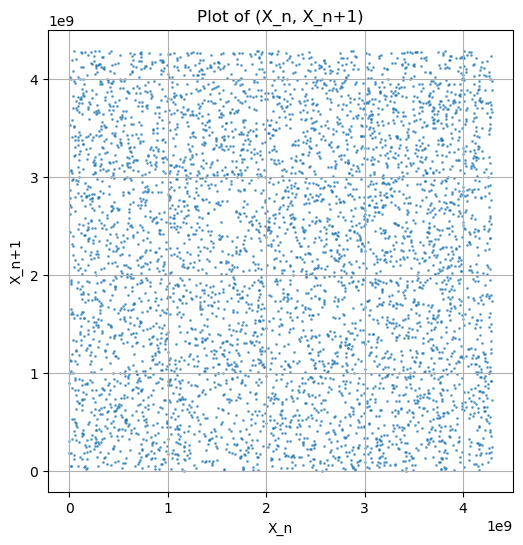

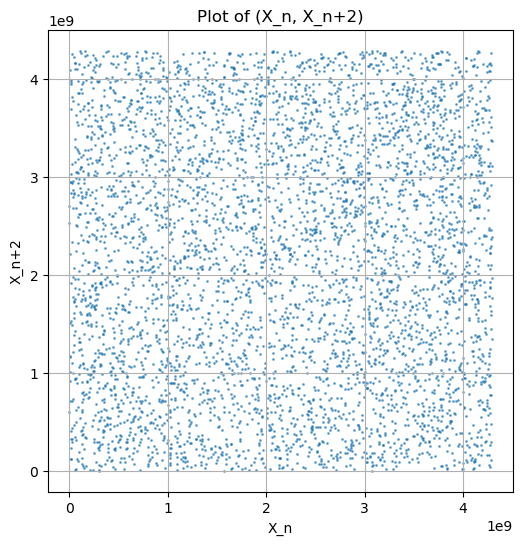

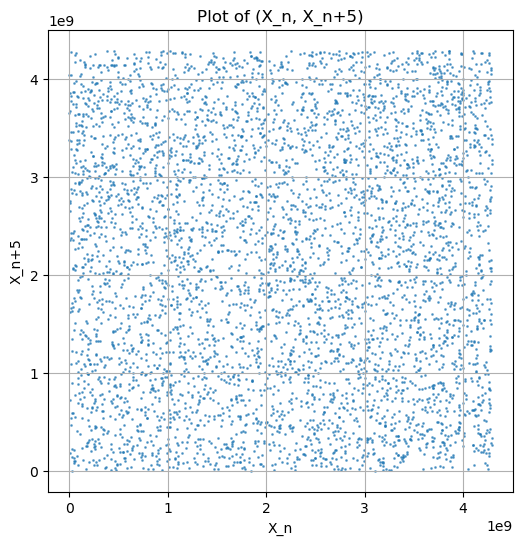

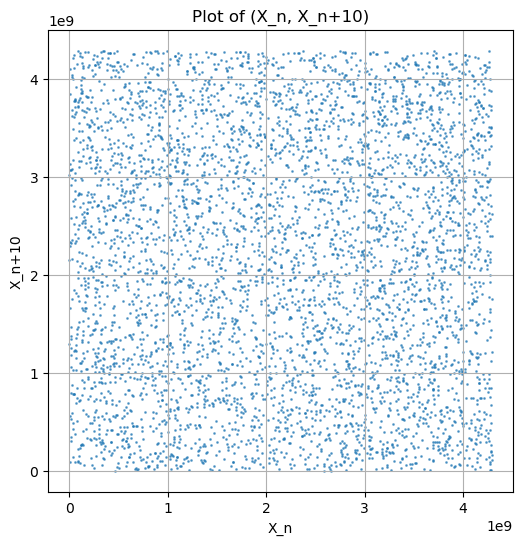

In [15]:
import matplotlib.pyplot as plt

class KissGenerator:
    def __init__(self, i_seed, j_seed, k_seed):
        """Initialize the generator with seeds."""
        self.i = i_seed
        self.j = j_seed
        self.k = k_seed

    def congruential_generator(self):
        """Generate the next value using the congruential generator."""
        self.i = (69069 * self.i + 23606797) % (2 ** 32)
        return self.i

    def shift_register_j(self):
        """Generate the next value for J_n using shift register."""
        self.j ^= (self.j << 17) & 0xFFFFFFFF  # Ensure 32-bit overflow
        self.j ^= (self.j >> 15) & 0xFFFFFFFF
        return self.j

    def shift_register_k(self):
        """Generate the next value for K_n using shift register."""
        self.k = ((self.k & 0xFFFFFFFF) ^ ((self.k << 18) & 0xFFFFFFFF)) & 0x7FFFFFFF
        self.k ^= (self.k >> 13)
        return self.k

    def next(self):
        """Generate the next Kiss value."""
        i_next = self.congruential_generator()
        j_next = self.shift_register_j()
        k_next = self.shift_register_k()
        return (i_next + j_next + k_next) % (2 ** 32)

    def generate_sequence(self, n):
        """Generate a sequence of n random numbers."""
        return [self.next() for _ in range(n)]

# Initialize the Kiss generator
kiss_gen = KissGenerator(i_seed=123456789, j_seed=987654321, k_seed=192837465)

# Generate a sequence of 5000 numbers
sequence = kiss_gen.generate_sequence(5000)

# Visualize (X_n, X_n+k) for k=1, 2, 5, 10
def plot_kiss_pairs(sequence, k, title):
    x = sequence[:-k]
    y = sequence[k:]
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=1, alpha=0.6)
    plt.title(title)
    plt.xlabel(f"X_n")
    plt.ylabel(f"X_n+{k}")
    plt.grid(True)
    plt.show()

# Plot (X_n, X_n+1), (X_n, X_n+2), (X_n, X_n+5), (X_n, X_n+10)
plot_kiss_pairs(sequence, 1, "Plot of (X_n, X_n+1)")
plot_kiss_pairs(sequence, 2, "Plot of (X_n, X_n+2)")
plot_kiss_pairs(sequence, 5, "Plot of (X_n, X_n+5)")
plot_kiss_pairs(sequence, 10, "Plot of (X_n, X_n+10)")


## Key Differences: Monte Carlo vs. Quasi-Monte Carlo

| **Feature**            | **Monte Carlo**                                  | **Quasi-Monte Carlo**                            |
|------------------------|--------------------------------------------------|--------------------------------------------------|
| **Point Generation**    | Random or pseudo-random                          | Deterministic (low-discrepancy)                  |
| **Error Rate**          | $ O\left(\frac{1}{\sqrt{N}}\right) $           | $ O\left(\frac{\log^d(N)}{N}\right) $         |
| **Uniform Coverage**    | May cluster or leave gaps                        | Covers space evenly                              |
| **Example Sequences**   | Pseudo-random                                   | Halton, Sobol, Niederreiter                      |

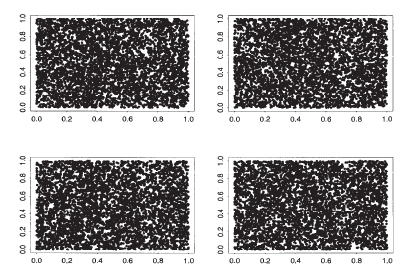

## Figure 2.10: Plots of Pairs 

$(X_n, X_{n+1}), (X_n, X_{n+2}), (X_n, X_{n+5}), and (X_n, X_{n+10})$

The following plots show pairs of generated values $ (X_n, X_{n+1}) $, $ (X_n, X_{n+2}) $, $ (X_n, X_{n+5}) $, and $ (X_n, X_{n+10}) $ for a sample of 5000 generations from the Kiss algorithm. These plots represent the uniformity and independence of the generated sequence over time.



### Explanation:
1. **Divergence and Kolmogorov-Smirnov Distance**: 
   - The divergence $ D(\{x_n\}) $ measures how well the sequence covers the interval $[0, 1]$ in a uniform manner.
   - The Kolmogorov-Smirnov distance quantifies the difference between the empirical distribution of the sequence and the uniform distribution.

2. **Low-Discrepancy Sequences**:
   - Sequences with low discrepancy (such as Halton, Sobol, and Niederreiter sequences) are designed to ensure that the points are spread evenly across the interval $[0, 1]$, minimizing gaps and clustering.

3. **Error Bound**:
   - The error bound shows that the error in numerical integration using a low-discrepancy sequence is proportional to the divergence $ D(\{x_n\}) $, meaning that low-discrepancy sequences lead to smaller errors in approximation.

This markdown with LaTeX formulas will render correctly in a Jupyter notebook or any markdown editor that supports LaTeX. Let me know if you need any adjustments!


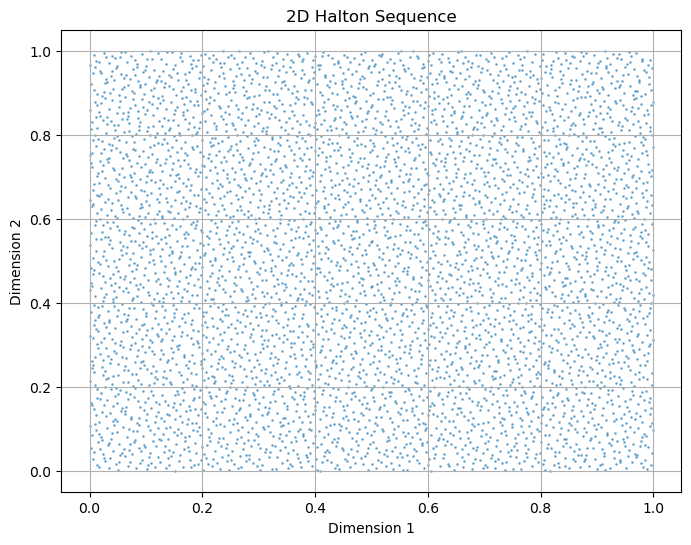

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Halton Sequence Generator
def halton_sequence(index, base):
    """Generate the index-th value in the Halton sequence for a given base."""
    result = 0
    f = 1 / base
    while index > 0:
        result += f * (index % base)
        index = index // base
        f = f / base
    return result

# Generate n values of the Halton sequence for a given dimension
def generate_halton_sequence(n, bases):
    """Generate the first n points of a Halton sequence in d dimensions."""
    sequence = np.zeros((n, len(bases)))
    for i in range(n):
        for d in range(len(bases)):
            sequence[i, d] = halton_sequence(i + 1, bases[d])  # i+1 to start from the first value
    return sequence

# Parameters
n_points = 5000  # Number of points to generate
bases = [2, 3]  # Bases for the 2D Halton sequence (base-2 and base-3)

# Generate the sequence
sequence = generate_halton_sequence(n_points, bases)

# Plotting the sequence (first 2 dimensions)
plt.figure(figsize=(8, 6))
plt.scatter(sequence[:, 0], sequence[:, 1], s=1, alpha=0.5)
plt.title('2D Halton Sequence')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [17]:
# Function to estimate the integral of a function using Quasi-Monte Carlo
def quasi_monte_carlo_integral(f, n, bases):
    """Estimate the integral of a function f using the first n points of the Halton sequence."""
    halton_points = generate_halton_sequence(n, bases)
    integral_estimate = np.mean([f(x) for x in halton_points])  # Monte Carlo estimate
    return integral_estimate

# Example function to integrate
def example_function(x):
    return np.sin(np.pi * x[0]) * np.cos(np.pi * x[1])  # Example: f(x, y) = sin(pi * x) * cos(pi * y)

# Estimate the integral for 5000 points
estimated_integral = quasi_monte_carlo_integral(example_function, n_points, bases)
print(f"Estimated integral: {estimated_integral}")

# True integral value (analytically computed)
true_integral = 0  # Analytical result for this example function over [0,1]x[0,1]
print(f"True integral value: {true_integral}")

# Divergence (Kolmogorov-Smirnov distance) calculation
def divergence(sequence):
    """Calculate the divergence (Kolmogorov-Smirnov distance) between the sequence and the uniform distribution."""
    n = len(sequence)
    sorted_sequence = np.sort(sequence)
    ks_distance = np.max(np.abs(np.arange(1, n+1) / n - sorted_sequence))  # Kolmogorov-Smirnov distance
    return ks_distance

# Calculate divergence for one dimension of the Halton sequence
ks_distance = divergence(sequence[:, 0])
print(f"Kolmogorov-Smirnov distance: {ks_distance}")


Estimated integral: 0.0005920760283190941
True integral value: 0
Kolmogorov-Smirnov distance: 0.0006839843750000019


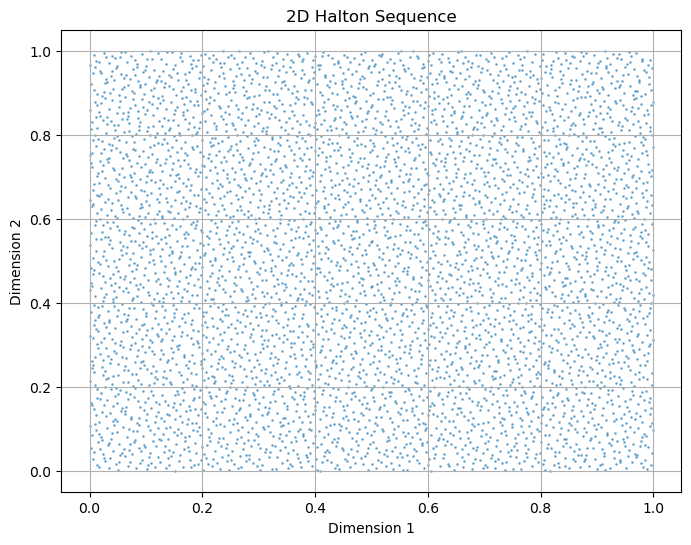

In [18]:
import matplotlib.pyplot as plt

# Halton Sequence Generator
def halton_sequence(index, base):
    """Generate the index-th value in the Halton sequence for a given base."""
    result = 0
    f = 1 / base
    while index > 0:
        result += f * (index % base)
        index = index // base
        f = f / base
    return result

# Generate n values of the Halton sequence for a given dimension
def generate_halton_sequence(n, bases):
    """Generate the first n points of a Halton sequence in d dimensions."""
    sequence = []
    for i in range(1, n + 1):  # Starting from 1 (first element is at index 1)
        point = []
        for d in range(len(bases)):
            point.append(halton_sequence(i, bases[d]))  # i to get the nth element
        sequence.append(point)
    return sequence

# Parameters
n_points = 5000  # Number of points to generate
bases = [2, 3]  # Bases for the 2D Halton sequence (base-2 and base-3)

# Generate the sequence
sequence = generate_halton_sequence(n_points, bases)

# Plotting the sequence (first 2 dimensions)
x_vals = [point[0] for point in sequence]
y_vals = [point[1] for point in sequence]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, s=1, alpha=0.5)
plt.title('2D Halton Sequence')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [19]:
# Function to estimate the integral of a function using Quasi-Monte Carlo
def quasi_monte_carlo_integral(f, n, bases):
    """Estimate the integral of a function f using the first n points of the Halton sequence."""
    halton_points = generate_halton_sequence(n, bases)
    integral_estimate = 0
    for point in halton_points:
        integral_estimate += f(point)
    integral_estimate /= n  # Take the average
    return integral_estimate

# Example function to integrate
def example_function(x):
    return (x[0] ** 2 + x[1] ** 2)  # Example: f(x, y) = x^2 + y^2

# Estimate the integral for 5000 points
estimated_integral = quasi_monte_carlo_integral(example_function, n_points, bases)
print(f"Estimated integral: {estimated_integral}")

# True integral value (analytically computed for the example function)
true_integral = 1 / 3  # Exact value of the integral of x^2 + y^2 over [0,1]x[0,1]
print(f"True integral value: {true_integral}")

# Divergence (Kolmogorov-Smirnov distance) calculation
def divergence(sequence):
    """Calculate the divergence (Kolmogorov-Smirnov distance) between the sequence and the uniform distribution."""
    n = len(sequence)
    sorted_sequence = sorted(sequence)
    ks_distance = max(abs((i / n) - sorted_sequence[i - 1]) for i in range(1, n + 1))  # Kolmogorov-Smirnov distance
    return ks_distance

# Calculate divergence for one dimension of the Halton sequence
ks_distance = divergence(x_vals)  # Use x values for divergence
print(f"Kolmogorov-Smirnov distance: {ks_distance}")


Estimated integral: 0.665955920001841
True integral value: 0.3333333333333333
Kolmogorov-Smirnov distance: 0.0006839843750000019


## Mixture Representations and Comparison with Standard Monte Carlo Methods

### Theoretical Background

In the context of numerical integration, it is noted that the gain over standard Monte Carlo methods can be substantial when we use low-discrepancy sequences, such as those in Quasi-Monte Carlo methods. This is because standard Monte Carlo methods result in an error of the order $ O\left( \frac{1}{\sqrt{N}} \right) $, while Quasi-Monte Carlo methods can provide an error of the order $ O\left( \frac{\log^d(N)}{N} \right) $, where $ d $ is the dimension of the integration space.

This improved error rate is especially beneficial in higher dimensions. When we compare standard Monte Carlo methods to techniques such as Riemann sums, the former shows an error of the order $ \frac{1}{N^{1/d}} $, which is slower as the dimension $ d $ increases. Thus, in practice, the advantage of Quasi-Monte Carlo methods becomes clear.

### Infinite Divisibility and Mixture Representations

In the theory of random variables and their distributions, a random variable $ X $ is said to be **infinitely divisible** if for any integer $ n $, there exist independent and identically distributed (i.i.d.) random variables $ X_1, X_2, ..., X_n $ such that:

$$ X \overset{d}{=} X_1 + X_2 + \cdots + X_n $$

This implies that infinitely divisible distributions, such as Poisson or noncentral chi-square distributions, can be represented as mixtures of simpler distributions. A notable case is the **noncentral chi-square distribution** $ \chi^2_{\nu}(A) $, which can be represented as a mixture of Poisson distributions.

However, the theoretical representation of these distributions does not necessarily guarantee that the simulation of such distributions will always be easy. Despite this, many distributions that are infinitely divisible can be represented as mixtures of simpler components, such as uniform distributions on intervals.

### Trapezoidal Approximation and Application

If we consider a **finite mixture**:

$$ f(x) = \sum_{i=1}^m p_i f_i(x) $$

where $ p_i $ are weights and $ f_i(x) $ are simple component distributions (for instance, uniform distributions), we can approximate the integral of $ f(x) $ over an interval $[a, b]$ using a **trapezoidal approximation**:

$$ \int_a^b f(x) \, dx \approx \frac{b - a}{2} \left( f(a) + f(b) \right) $$

The weight $ p_i $ is proportional to the integral of $ f_i(x) $ over the interval, and this approximation is particularly useful when $ f(x) $ is a polynomial on $[0,1]$.


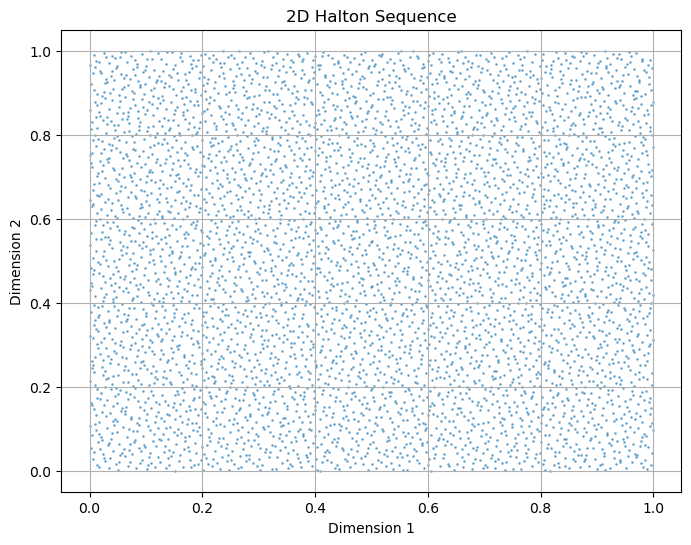

Estimated integral of the mixture function: 0.4000000999999996
Estimated integral of x^2: 0.33333349999999995


In [20]:
import matplotlib.pyplot as plt

# Halton Sequence Generator (as previously defined)
def halton_sequence(index, base):
    result = 0
    f = 1 / base
    while index > 0:
        result += f * (index % base)
        index = index // base
        f = f / base
    return result

def generate_halton_sequence(n, bases):
    sequence = []
    for i in range(1, n + 1):  # Starting from 1 (first element is at index 1)
        point = []
        for d in range(len(bases)):
            point.append(halton_sequence(i, bases[d]))  # i to get the nth element
        sequence.append(point)
    return sequence

# Trapezoidal approximation of a function over an interval [a, b]
def trapezoidal_integral(f, a, b, n):
    """Approximate the integral of function f over [a, b] using the trapezoidal rule with n subintervals."""
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    return integral * h

# Example of a simple mixture function f(x) = p1*f1(x) + p2*f2(x)
def f1(x):
    return x**2  # Polynomial f1(x) = x^2

def f2(x):
    return x  # Linear function f2(x) = x

# Mixture representation
def mixture_function(x, p1, p2):
    return p1 * f1(x) + p2 * f2(x)  # p1*f1(x) + p2*f2(x)

# Parameters for Halton sequence
n_points = 5000
bases = [2, 3]  # 2D Halton sequence (base 2 and base 3)

# Generate Halton sequence
halton_seq = generate_halton_sequence(n_points, bases)

# Visualizing the Halton sequence
x_vals = [point[0] for point in halton_seq]
y_vals = [point[1] for point in halton_seq]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, s=1, alpha=0.5)
plt.title('2D Halton Sequence')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# Numerical integration using the trapezoidal rule
a, b = 0, 1  # Interval [0, 1]
n_intervals = 1000  # Number of subintervals

# Integrate the mixture function with p1=0.6, p2=0.4
integral_estimate = trapezoidal_integral(lambda x: mixture_function(x, 0.6, 0.4), a, b, n_intervals)
print(f"Estimated integral of the mixture function: {integral_estimate}")

# For comparison, let's estimate the integral of x^2 (just f1)
integral_f1 = trapezoidal_integral(f1, a, b, n_intervals)
print(f"Estimated integral of x^2: {integral_f1}")
